# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [3]:
data = pd.read_csv("Clean_data.csv")

In [4]:
data.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment_Duration,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,...,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade,Sub Grade,Home_Ownership,Verification Status,Loan Title,Initial List Status,Application Type
0,10000,32236,12329.36286,59,11.135007,176346.62670,16.284758,1,0,13,...,311301,6619,0,B,C4,MORTGAGE,Not Verified,debt consolidation,w,INDIVIDUAL
1,3609,11940,12191.99692,59,12.237563,39833.92100,15.412409,0,0,12,...,182610,20885,0,C,D3,RENT,Source Verified,debt consolidation,f,INDIVIDUAL
2,28276,9311,21603.22455,59,12.545884,91506.69105,28.137619,0,0,14,...,89801,26155,0,F,D4,MORTGAGE,Source Verified,debt consolidation,w,INDIVIDUAL
3,11170,6954,17877.15585,59,16.731201,108286.57590,18.043730,1,0,7,...,9189,60214,0,C,C3,MORTGAGE,Source Verified,debt consolidation,w,INDIVIDUAL
4,16890,13226,13539.92667,59,15.008300,44234.82545,17.209886,1,3,13,...,126029,22579,0,C,D4,MORTGAGE,Source Verified,credit card refinance,w,INDIVIDUAL


# Data Transformation

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

In [6]:
grade_map = {'A':7, 'B':6, 'C':5,'D':4,'E':3 ,'F':2, 'G':1}
subgrade_map = {
    'A1': 35,'A2': 34,'A3': 33,'A4': 32,'A5': 31,'B1': 30,'B2': 29,'B3': 28,'B4': 27,'B5': 26,'C1': 25,'C2': 24,'C3': 23,
    'C4': 22,'C5': 21,'D1': 20,'D2': 19,'D3': 18,'D4': 17,'D5': 16,'E1': 15,'E2': 14,'E3': 13,'E4': 12,'E5': 11,'F1': 10,'F2': 9,
    'F3': 8,'F4': 7,'F5': 6,'G1': 5,'G2': 4,'G3': 3,'G4': 2,'G5': 1
}
verification_status_map = {'Not Verified':1, 'Source Verified':2, 'Verified':3}

In [7]:
# Replace your ordinal categorical feature with encoded values using the custom mapping
data['Grade'] = data['Grade'].map(grade_map)
data['Sub Grade'] = data['Sub Grade'].map(subgrade_map)
data['Verification Status'] = data['Verification Status'].map(verification_status_map)

In [8]:
data.head(2)

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment_Duration,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,...,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade,Sub Grade,Home_Ownership,Verification Status,Loan Title,Initial List Status,Application Type
0,10000,32236,12329.36286,59,11.135007,176346.6267,16.284758,1,0,13,...,311301,6619,0,6,22,MORTGAGE,1,debt consolidation,w,INDIVIDUAL
1,3609,11940,12191.99692,59,12.237563,39833.9210,15.412409,0,0,12,...,182610,20885,0,5,18,RENT,2,debt consolidation,f,INDIVIDUAL


**Create function to transform data**

In [9]:
def transform_data(dataframe, target):
    df = dataframe.drop([target], axis =1)
    
    numerical_features = df.select_dtypes(exclude = "object").columns.to_list()
    categorical_features = df.select_dtypes(include = "object").columns.to_list()
    
    # Transformers
    numerical_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(drop = 'if_binary')
    
    pipeline = ColumnTransformer(
    [
       ( "numerical transformer", numerical_transformer, numerical_features),
        ("categorical transformer", categorical_transformer, categorical_features)
    ])
    
    # apply transformer
    transformed_array = pipeline.fit_transform(df)
    
    # Get the transformed column names
    transformed_numerical_columns = pipeline.transformers_[0][2]
    transformed_categorical_columns = pipeline.transformers_[1][1].get_feature_names_out(input_features=categorical_features)
    
    # Combine numerical and categorical transformed column names
    transformed_columns = list(transformed_numerical_columns) + list(transformed_categorical_columns)
    
    # convert array to dataframe
    transformed_data = pd.DataFrame(transformed_array, columns=transformed_columns)
    
    
    # attach target feature
    transformed_data[target] = dataframe[target]
    
    return transformed_data

In [10]:
transformed_data = transform_data(data, "Loan Status")

In [11]:
transformed_data.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment_Duration,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,...,Loan Title_payoff,Loan Title_personal,Loan Title_pool,Loan Title_refinance,Loan Title_relief,Loan Title_vacation,Loan Title_wedding loan,Initial List Status_w,Application Type_JOINT,Loan Status
0,-0.818483,2.020064,-0.337854,0.248297,-0.191268,2.127642,-0.829943,0.840164,-0.307961,-0.203463,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,-1.582243,-0.469958,-0.358098,0.248297,0.105229,-0.904035,-0.933158,-0.408459,-0.307961,-0.364105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.365603,-0.792498,1.028905,0.248297,0.188142,0.243515,0.572470,-0.408459,-0.307961,-0.042821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.678661,-1.081668,0.479766,0.248297,1.313651,0.616163,-0.621824,0.840164,-0.307961,-1.167316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.004911,-0.312185,-0.159444,0.248297,0.850331,-0.806299,-0.720484,0.840164,6.030678,-0.203463,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [12]:
transformed_data["Loan Status"].value_counts()

Loan Status
0    61222
1     6241
Name: count, dtype: int64

# Modeling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

# import pca
from sklearn.decomposition import PCA

In [14]:
train_df, test_df = train_test_split(transformed_data, stratify= transformed_data["Loan Status"], test_size=0.3)

In [15]:
def base_line_model(data_frame, target):
    #split data into X and y
    X_data = data_frame.drop([target],axis = 1)
    y_data = data_frame[target]

    # Assuming X and y into train and test
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42, stratify=y_data)


    # Define classifiers
    classifiers = {
        'Logistics Regression': LogisticRegression(),
        'Decision tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'XGBoost': XGBClassifier()
    }

    # FIT models
    for classifier_name, classifier in classifiers.items():
        precision = []
        recall = []
        accuracy = []
        f1 = []
        print(f"\nResults for {classifier_name}:\n")

        # Train the classifier
        clss = classifier
        clss.fit(X_train, y_train)

        # Make predictions on Train
        y_train_pred = clss.predict(X_train)

        # Make predictions on Test
        y_pred = clss.predict(X_test)

        # Train info: Calculate and print metrics
        Train_accuracy = accuracy_score(y_train, y_train_pred)
        Train_precision = precision_score(y_train, y_train_pred)
        Train_recall = recall_score(y_train, y_train_pred)
        Train_f1 = f1_score(y_train, y_train_pred)


        # Test info: Calculate and print metrics
        Test_accuracy = accuracy_score(y_test, y_pred)
        Test_precision = precision_score(y_test, y_pred)
        Test_recall = recall_score(y_test, y_pred)
        Test_f1 = f1_score(y_test, y_pred)

        # print train result
        print(f"\n Results from Train:")
        print(f"Accuracy: {Train_accuracy:.4f}")
        
        print(f"Precision: {Train_precision:.4f}")
        print(f"Recall: {Train_recall:.4f}")
        print(f"F1 Score: {Train_f1:.4f}")

        # print test result
        print(f"\n Results from Test:")
        print(f"Accuracy: {Test_accuracy:.4f}")
        print(f"Precision: {Test_precision:.4f}")
        print(f"Recall: {Test_recall:.4f}")
        print(f"F1 Score: {Test_f1:.4f}")

In [16]:
base_line_model(transformed_data, "Loan Status")


Results for Logistics Regression:


 Results from Train:
Accuracy: 0.9075
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

 Results from Test:
Accuracy: 0.9075
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Results for Decision tree:


 Results from Train:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

 Results from Test:
Accuracy: 0.8164
Precision: 0.0920
Recall: 0.1111
F1 Score: 0.1007

Results for Random Forest:


 Results from Train:
Accuracy: 0.9999
Precision: 1.0000
Recall: 0.9991
F1 Score: 0.9995

 Results from Test:
Accuracy: 0.9075
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Results for XGBoost:


 Results from Train:
Accuracy: 0.9261
Precision: 1.0000
Recall: 0.2007
F1 Score: 0.3343

 Results from Test:
Accuracy: 0.9066
Precision: 0.2000
Recall: 0.0032
F1 Score: 0.0063


In [17]:
transformed_data.shape

(67463, 65)

In [18]:
def plot_pca(dataframe,target, n, m):
      # drop target feature from dataframe
    df = dataframe.drop([target], axis = 1)

      # Initialize pca
    pca = PCA(n_components= n, random_state= 360)

      # fit pca
    pca_data = pca.fit_transform(df)
    pca_data = pd.DataFrame(data = pca_data, index = df.index)
    pca_data[target] = dataframe[target]

    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

      # Create the scree plot
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
    plt.title('Scree Plot of Cumulative Explained Variance')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid()
    plt.show()

      # get a dataframe of explained variance
    importance = pd.DataFrame(data = pca.explained_variance_ratio_)
    importance = importance.T
    importance

    print(f'Variance Captured by First {m} Principal Components: ',
    importance.loc[:,0:m].sum(axis=1).values)

    return pca_data

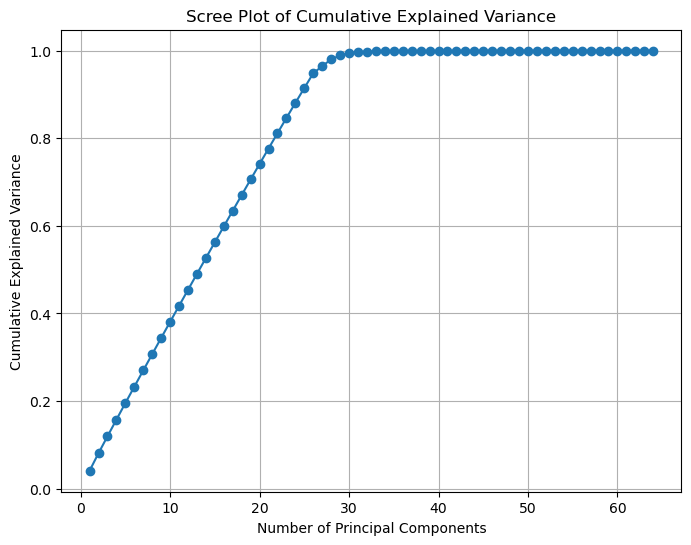

Variance Captured by First 30 Principal Components:  [0.99676734]


In [19]:
pca_data = plot_pca(transformed_data,"Loan Status", 64,30)

In [20]:
pca_data = pca_data.drop(pca_data.columns[30:64], axis = 1)

In [21]:
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Loan Status
0,0.525574,0.531966,-0.749673,-0.247662,-0.324041,-0.244928,0.060185,-1.663798,-1.323082,-1.550206,...,1.412604,-0.523427,1.332297,1.089571,-2.121744,0.433166,-0.892783,-0.370139,-0.124794,0
1,-0.600202,1.323904,-0.871583,-0.287482,0.645162,-0.433057,-0.954299,1.109360,-0.217563,0.090485,...,-1.204666,-0.237841,-0.164945,0.082496,-0.490569,0.985567,0.487916,0.401594,-0.190863,0
2,1.472882,0.232536,-0.329181,0.653298,-0.862804,1.373631,0.608277,-0.472888,0.924880,1.116135,...,0.580407,0.096417,-0.556020,0.053921,1.682977,0.442777,-0.854840,-0.478675,-0.117790,0
3,1.277769,-0.742807,-0.991913,0.046292,-0.380473,-1.070536,-0.955124,0.540810,0.390845,-0.088858,...,-0.674511,-0.926257,0.451802,1.723517,-0.793626,0.478176,-0.817424,-0.380167,-0.062516,0
4,3.535706,-0.871761,0.347137,-1.223396,4.096286,-1.456537,3.088343,-0.234659,1.963526,-0.863641,...,-2.227188,0.183903,1.514233,0.022517,0.494545,-0.818078,-0.361591,-0.417624,-0.148065,0


In [22]:
base_line_model(pca_data, "Loan Status")


Results for Logistics Regression:


 Results from Train:
Accuracy: 0.9075
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

 Results from Test:
Accuracy: 0.9075
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Results for Decision tree:


 Results from Train:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

 Results from Test:
Accuracy: 0.8204
Precision: 0.0995
Recall: 0.1170
F1 Score: 0.1076

Results for Random Forest:


 Results from Train:
Accuracy: 1.0000
Precision: 1.0000
Recall: 0.9998
F1 Score: 0.9999

 Results from Test:
Accuracy: 0.9075
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Results for XGBoost:


 Results from Train:
Accuracy: 0.9312
Precision: 1.0000
Recall: 0.2564
F1 Score: 0.4081

 Results from Test:
Accuracy: 0.9065
Precision: 0.1111
Recall: 0.0016
F1 Score: 0.0032


# Experiment with xgboost

### Exp1: Train on default param but add the imbalance parameter

In [23]:
def exp_1(data, target, param_dict):
    #split data into X and y
    X_data = data.drop([target],axis = 1)
    y_data = data[target]

    # Assuming X and y into train and test
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42, stratify=y_data)
    
    # initalize classifier
    clf = XGBClassifier(**param_dict)
                        
    # Fit to data
    clf.fit(X_train, y_train,eval_set = [(X_train, y_train), (X_test, y_test)], verbose = 10)
    
    # predict on train
    y_train_pred = clf.predict(X_train)
    
    #predict on test data
    y_pred = clf.predict(X_test)
    
    predict_dict = {"train": [y_train, y_train_pred], "test": [y_test, y_pred]}
    
    for key, value in predict_dict.items():
        print("results for ", key)
        print( key ," accuracy =", accuracy_score(value[0], value[1]))
        print(key ,"precision =", precision_score(value[0], value[1]))
        print( key, "recall =", recall_score(value[0], value[1]))
        print(key, "f1 =", f1_score(value[0], value[1]))
        print("------------------------------------------")

In [24]:
exp_1(data= transformed_data, target= "Loan Status", param_dict = {"scale_pos_weight": 9.809})

[0]	validation_0-logloss:0.68474	validation_1-logloss:0.68756
[10]	validation_0-logloss:0.62875	validation_1-logloss:0.65423
[20]	validation_0-logloss:0.58773	validation_1-logloss:0.63144
[30]	validation_0-logloss:0.54638	validation_1-logloss:0.60763
[40]	validation_0-logloss:0.51939	validation_1-logloss:0.59391
[50]	validation_0-logloss:0.49015	validation_1-logloss:0.57638
[60]	validation_0-logloss:0.46050	validation_1-logloss:0.55989
[70]	validation_0-logloss:0.43273	validation_1-logloss:0.54530
[80]	validation_0-logloss:0.41142	validation_1-logloss:0.53437
[90]	validation_0-logloss:0.38966	validation_1-logloss:0.52344
[99]	validation_0-logloss:0.37308	validation_1-logloss:0.51447
results for  train
train  accuracy = 0.8980603083178045
train precision = 0.47492957746478875
train recall = 0.9647516594186313
train f1 = 0.6365146481425551
------------------------------------------
results for  test
test  accuracy = 0.7683185928158506
test precision = 0.09374098644361119
test recall = 0.

**Model is overfitting**

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
def find_best_param(df,target):
    X_train = df.drop([target], axis =1)
    y_train = df[target]

    param_dist = {
        # params for tree structure
        "max_depth": range(3, 6),
        "subsample": np.arange(0.5, 1),
        
        # parameters for learning
        "n_estimators": range(50, 150, 50),
        "learning_rate": np.arange(0.05, 0.2)
        
}
    
    # Instantiate the XGBoost classifier
    xgb = XGBClassifier(scale_pos_weight = 9.809,)
    
    # Define scoring metrics
    scoring = {
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score)
    }

    # Instantiate the RandomizedSearchCV object
    random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist,
                                       n_iter=100, cv=5, random_state=350, scoring = scoring,
                                     refit='recall' )

    random_search.fit(X_train, y_train)

    best_param = random_search.best_params_
    best_score = random_search.best_score_

    return best_param, best_score

In [27]:
exp2_param, best_score = find_best_param(transformed_data,"Loan Status")

In [28]:
best_score

0.48245250046190796

In [29]:
exp2_param

{'subsample': 0.5, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.05}

In [30]:
exp_1(data= transformed_data, target= "Loan Status", param_dict = {'subsample': 0.5, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.05,
                                                                  "scale_pos_weight": 9.809})

[0]	validation_0-logloss:0.69305	validation_1-logloss:0.69306
[10]	validation_0-logloss:0.68958	validation_1-logloss:0.69038
[20]	validation_0-logloss:0.68614	validation_1-logloss:0.68771
[30]	validation_0-logloss:0.68418	validation_1-logloss:0.68627
[40]	validation_0-logloss:0.68155	validation_1-logloss:0.68422
[49]	validation_0-logloss:0.68044	validation_1-logloss:0.68353
results for  train
train  accuracy = 0.5749195324411316
train precision = 0.12223986145186895
train recall = 0.5815976195925842
train f1 = 0.20201939895054857
------------------------------------------
results for  test
test  accuracy = 0.557240970403676
test precision = 0.10489354587002564
test recall = 0.5026709401709402
test f1 = 0.17356820068246798
------------------------------------------


In [31]:
exp_1(data= transformed_data, target= "Loan Status", param_dict = {'subsample': 0.5, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.05,
                                                                  "scale_pos_weight": 10.1})

[0]	validation_0-logloss:0.70506	validation_1-logloss:0.70508
[10]	validation_0-logloss:0.70153	validation_1-logloss:0.70235
[20]	validation_0-logloss:0.69801	validation_1-logloss:0.69958
[30]	validation_0-logloss:0.69600	validation_1-logloss:0.69809
[40]	validation_0-logloss:0.69329	validation_1-logloss:0.69602
[49]	validation_0-logloss:0.69215	validation_1-logloss:0.69529
results for  train
train  accuracy = 0.4890310011858377
train precision = 0.1157391202893478
train recall = 0.6811627374685283
train f1 = 0.19785918489462134
------------------------------------------
results for  test
test  accuracy = 0.4701319235140076
test precision = 0.1001806684733514
test recall = 0.5924145299145299
test f1 = 0.1713800030907124
------------------------------------------


In [32]:
exp_1(data= transformed_data, target= "Loan Status", param_dict = {'subsample': 0.5, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.04,
                                                                  "scale_pos_weight": 12})

[0]	validation_0-logloss:0.77993	validation_1-logloss:0.77999
[10]	validation_0-logloss:0.77661	validation_1-logloss:0.77731
[20]	validation_0-logloss:0.77308	validation_1-logloss:0.77445
[30]	validation_0-logloss:0.77078	validation_1-logloss:0.77271
[40]	validation_0-logloss:0.76813	validation_1-logloss:0.77060
[49]	validation_0-logloss:0.76683	validation_1-logloss:0.76955
results for  train
train  accuracy = 0.14736151109605286
train precision = 0.09598415271024671
train recall = 0.9759670405127031
train f1 = 0.1747791691431148
------------------------------------------
results for  test
test  accuracy = 0.1405701862740254
test precision = 0.09332425068119891
test recall = 0.9513888888888888
test f1 = 0.16997518610421838
------------------------------------------


In [33]:
exp_1(data= transformed_data, target= "Loan Status", param_dict = {'subsample': 0.5, 'n_estimators': 270, 'max_depth': 3, "learning_rate": 0.05,
                                                                  "scale_pos_weight": 9.809})

[0]	validation_0-logloss:0.69305	validation_1-logloss:0.69306
[10]	validation_0-logloss:0.68958	validation_1-logloss:0.69038
[20]	validation_0-logloss:0.68614	validation_1-logloss:0.68771
[30]	validation_0-logloss:0.68418	validation_1-logloss:0.68627
[40]	validation_0-logloss:0.68155	validation_1-logloss:0.68422
[50]	validation_0-logloss:0.68065	validation_1-logloss:0.68381
[60]	validation_0-logloss:0.67868	validation_1-logloss:0.68245
[70]	validation_0-logloss:0.67722	validation_1-logloss:0.68171
[80]	validation_0-logloss:0.67414	validation_1-logloss:0.67909
[90]	validation_0-logloss:0.67323	validation_1-logloss:0.67879
[100]	validation_0-logloss:0.67146	validation_1-logloss:0.67763
[110]	validation_0-logloss:0.67118	validation_1-logloss:0.67777
[120]	validation_0-logloss:0.67009	validation_1-logloss:0.67725
[130]	validation_0-logloss:0.66916	validation_1-logloss:0.67686
[140]	validation_0-logloss:0.66856	validation_1-logloss:0.67674
[150]	validation_0-logloss:0.66585	validation_1-log

In [34]:
exp_1(data= transformed_data, target= "Loan Status", param_dict = {'subsample': 0.5, 'n_estimators': 270, 'max_depth': 3, "learning_rate": 0.05,
                                                                  "scale_pos_weight": 9.809}, )

[0]	validation_0-logloss:0.69305	validation_1-logloss:0.69306
[10]	validation_0-logloss:0.68958	validation_1-logloss:0.69038
[20]	validation_0-logloss:0.68614	validation_1-logloss:0.68771
[30]	validation_0-logloss:0.68418	validation_1-logloss:0.68627
[40]	validation_0-logloss:0.68155	validation_1-logloss:0.68422
[50]	validation_0-logloss:0.68065	validation_1-logloss:0.68381
[60]	validation_0-logloss:0.67868	validation_1-logloss:0.68245
[70]	validation_0-logloss:0.67722	validation_1-logloss:0.68171
[80]	validation_0-logloss:0.67414	validation_1-logloss:0.67909
[90]	validation_0-logloss:0.67323	validation_1-logloss:0.67879
[100]	validation_0-logloss:0.67146	validation_1-logloss:0.67763
[110]	validation_0-logloss:0.67118	validation_1-logloss:0.67777
[120]	validation_0-logloss:0.67009	validation_1-logloss:0.67725
[130]	validation_0-logloss:0.66916	validation_1-logloss:0.67686
[140]	validation_0-logloss:0.66856	validation_1-logloss:0.67674
[150]	validation_0-logloss:0.66585	validation_1-log

In [35]:
exp_1(data= transformed_data, target= "Loan Status", param_dict = {'subsample': 0.5, 'n_estimators': 250, 'max_depth': 4, 'learning_rate': 0.05,
                                                                  "scale_pos_weight": 9.809})

[0]	validation_0-logloss:0.69273	validation_1-logloss:0.69280
[10]	validation_0-logloss:0.68652	validation_1-logloss:0.68819
[20]	validation_0-logloss:0.68066	validation_1-logloss:0.68387
[30]	validation_0-logloss:0.67704	validation_1-logloss:0.68142
[40]	validation_0-logloss:0.67288	validation_1-logloss:0.67849
[50]	validation_0-logloss:0.67019	validation_1-logloss:0.67691
[60]	validation_0-logloss:0.66672	validation_1-logloss:0.67441
[70]	validation_0-logloss:0.66397	validation_1-logloss:0.67279
[80]	validation_0-logloss:0.65964	validation_1-logloss:0.66961
[90]	validation_0-logloss:0.65752	validation_1-logloss:0.66864
[100]	validation_0-logloss:0.65507	validation_1-logloss:0.66712
[110]	validation_0-logloss:0.65364	validation_1-logloss:0.66650
[120]	validation_0-logloss:0.65149	validation_1-logloss:0.66549
[130]	validation_0-logloss:0.64971	validation_1-logloss:0.66465
[140]	validation_0-logloss:0.64750	validation_1-logloss:0.66352
[150]	validation_0-logloss:0.64341	validation_1-log

In [36]:
exp_1(data= transformed_data, target= "Loan Status", param_dict = {'subsample': 0.5, 'n_estimators': 250, 'max_depth': 4, 'learning_rate': 0.05,
                                                                  "scale_pos_weight": 9.809,'reg_alpha': 0.5})

[0]	validation_0-logloss:0.69273	validation_1-logloss:0.69281
[10]	validation_0-logloss:0.68666	validation_1-logloss:0.68825
[20]	validation_0-logloss:0.68085	validation_1-logloss:0.68409
[30]	validation_0-logloss:0.67730	validation_1-logloss:0.68172
[40]	validation_0-logloss:0.67314	validation_1-logloss:0.67847
[50]	validation_0-logloss:0.67038	validation_1-logloss:0.67673
[60]	validation_0-logloss:0.66684	validation_1-logloss:0.67434
[70]	validation_0-logloss:0.66392	validation_1-logloss:0.67279
[80]	validation_0-logloss:0.65966	validation_1-logloss:0.66976
[90]	validation_0-logloss:0.65759	validation_1-logloss:0.66872
[100]	validation_0-logloss:0.65493	validation_1-logloss:0.66700
[110]	validation_0-logloss:0.65353	validation_1-logloss:0.66648
[120]	validation_0-logloss:0.65147	validation_1-logloss:0.66547
[130]	validation_0-logloss:0.64938	validation_1-logloss:0.66440
[140]	validation_0-logloss:0.64748	validation_1-logloss:0.66357
[150]	validation_0-logloss:0.64338	validation_1-log